In [336]:
#  popularity & weeks on chart 
#prerequests
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import scipy.stats as sts
import seaborn as sns
from scipy.stats import linregress

In [337]:
#file paths 
file_audio = "/Users/amralwakeal/Desktop/Homework--Projeects/Priv_repo/Hot_Audio_Features.csv"
file_songs = "/Users/amralwakeal/Desktop/Homework--Projeects/Priv_repo/Hot_Stuff.csv"

In [338]:
# dataframe from files
audio_df = pd.read_csv(file_audio, encoding='ISO-8859-1', index_col = False)
stuff_df = pd.read_csv(file_songs, encoding='ISO-8859-1', index_col = False)
stuff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320495 entries, 0 to 320494
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ï»¿url                  320495 non-null  object 
 1   WeekID                  320495 non-null  object 
 2   Week Position           320495 non-null  int64  
 3   Song                    320495 non-null  object 
 4   Performer               320495 non-null  object 
 5   SongID                  320495 non-null  object 
 6   Instance                320495 non-null  int64  
 7   Previous Week Position  289711 non-null  float64
 8   Peak Position           320495 non-null  int64  
 9   Weeks on Chart          320495 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 24.5+ MB


In [339]:
stuff_df[['SongID', 'Performer', 'Song']].drop_duplicates()

,SongID,Performer,Song
0,Poor Little FoolRicky Nelson,Ricky Nelson,Poor Little Fool
1,One Sweet DayMariah Carey & Boyz II Men,Mariah Carey & Boyz II Men,One Sweet Day
2,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...
3,Do I Make You ProudTaylor Hicks,Taylor Hicks,Do I Make You Proud
4,3Britney Spears,Britney Spears,3
...,...,...,...
302076,What'd I SayRare Earth,Rare Earth,What'd I Say
302081,What'd You Come Here For?Trina & Tamara,Trina & Tamara,What'd You Come Here For?
302093,What's A Guy Gotta DoJoe Nichols,Joe Nichols,What's A Guy Gotta Do
302108,What's A Matter Baby (Is It Hurting You)Timi Yuro,Timi Yuro,What's A Matter Baby (Is It Hurting You)


In [340]:
audio_df[['SongID', 'Performer', 'Song']].drop_duplicates()

,SongID,Performer,Song
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again
...,...,...,...
28487,"Tonight, TonightThe Smashing Pumpkins",The Smashing Pumpkins,"Tonight, Tonight"
28488,Tonight's The Night (Gonna Be Alright)Rod Stewart,Rod Stewart,Tonight's The Night (Gonna Be Alright)
28489,Tonight's The NightBLACKstreet,BLACKstreet,Tonight's The Night
28490,Tonight's The NightS.S.O.,S.S.O.,Tonight's The Night


In [341]:
spotify_start = pd.DataFrame.merge(audio_df, stuff_df, on=['SongID', 'Performer', 'Song'], how='inner')

In [379]:
spotify_start.dropna(inplace=True)
spotify_start

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,valence,tempo,time_signature,ï»¿url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
124,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,0.856,135.979,4.0,https://www.billboard.com/charts/hot-100/2019-...,6/15/2019,98,1,94.0,94,2
125,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,0.856,135.979,4.0,https://www.billboard.com/charts/hot-100/2019-...,6/22/2019,94,1,98.0,94,3
126,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,0.856,135.979,4.0,https://www.billboard.com/charts/hot-100/2019-...,6/29/2019,87,1,94.0,87,4
127,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,0.856,135.979,4.0,https://www.billboard.com/charts/hot-100/2019-...,7/6/2019,78,1,87.0,78,5
128,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,0.856,135.979,4.0,https://www.billboard.com/charts/hot-100/2019-...,7/13/2019,98,1,78.0,78,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320799,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,https://p.scdn.co/mp3-preview/3bc545be6705bc2e...,The Very Best Of Solomon Burke,False,161186.0,28.0,...,0.633,173.305,3.0,http://www.billboard.com/charts/hot-100/1965-0...,7/3/1965,32,1,42.0,32,6
320800,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,https://p.scdn.co/mp3-preview/3bc545be6705bc2e...,The Very Best Of Solomon Burke,False,161186.0,28.0,...,0.633,173.305,3.0,http://www.billboard.com/charts/hot-100/1965-0...,7/10/1965,29,1,32.0,29,7
320801,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,https://p.scdn.co/mp3-preview/3bc545be6705bc2e...,The Very Best Of Solomon Burke,False,161186.0,28.0,...,0.633,173.305,3.0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,28,1,29.0,28,8
320802,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,https://p.scdn.co/mp3-preview/3bc545be6705bc2e...,The Very Best Of Solomon Burke,False,161186.0,28.0,...,0.633,173.305,3.0,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,32,1,28.0,28,9


In [380]:
new_spotify = spotify_start.loc[:, ['SongID', 'Performer', 'Song', 'spotify_genre', 
                                      'spotify_track_album','spotify_track_explicit', 'spotify_track_duration_ms',
                                      'spotify_track_popularity', 'WeekID','Week Position', 
                                      'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart']]

In [381]:
new_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149926 entries, 124 to 320803
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SongID                     149926 non-null  object 
 1   Performer                  149926 non-null  object 
 2   Song                       149926 non-null  object 
 3   spotify_genre              149926 non-null  object 
 4   spotify_track_album        149926 non-null  object 
 5   spotify_track_explicit     149926 non-null  object 
 6   spotify_track_duration_ms  149926 non-null  float64
 7   spotify_track_popularity   149926 non-null  float64
 8   WeekID                     149926 non-null  object 
 9   Week Position              149926 non-null  int64  
 10  Instance                   149926 non-null  int64  
 11  Previous Week Position     149926 non-null  float64
 12  Peak Position              149926 non-null  int64  
 13  Weeks on Chart             

In [395]:
new_spotify = spotify_start[(spotify_start['spotify_track_popularity'] > 60)].sort_values( by='spotify_track_popularity', ascending=False, inplace=False)

In [396]:
new_spotify

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,valence,tempo,time_signature,ï»¿url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
250,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,11/30/2019,19,1,23.0,19,7
248,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,11/16/2019,23,1,41.0,23,5
240,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,12/7/2019,11,1,19.0,11,8
241,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,13,1,11.0,11,9
243,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,10/26/2019,75,1,96.0,75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245563,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,5/5/2012,62,2,59.0,37,19
245562,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,4/28/2012,59,2,59.0,37,18
245561,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,4/21/2012,59,2,54.0,37,17
245560,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,4/14/2012,54,2,51.0,37,16


In [404]:
new_spotify.drop_duplicates()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,valence,tempo,time_signature,ï»¿url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
250,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,11/30/2019,19,1,23.0,19,7
248,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,11/16/2019,23,1,41.0,23,5
240,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,12/7/2019,11,1,19.0,11,8
241,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,13,1,11.0,11,9
243,Dance MonkeyTones And I,Tones And I,Dance Monkey,['australian pop'],2XU0oxnq2qxCpomAAuJY8K,https://p.scdn.co/mp3-preview/535ffea66207a0fc...,Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,...,0.513,98.027,4.0,https://www.billboard.com/charts/hot-100/2019-...,10/26/2019,75,1,96.0,75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245563,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,5/5/2012,62,2,59.0,37,19
245562,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,4/28/2012,59,2,59.0,37,18
245561,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,4/21/2012,59,2,54.0,37,17
245560,StripChris Brown Featuring Kevin K-MAC McCall,Chris Brown Featuring Kevin K-MAC McCall,Strip,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",0gFkruQrXlxIOo738m76Xb,https://p.scdn.co/mp3-preview/0936973ebbad1940...,Fortune (Expanded Edition),True,167813.0,61.0,...,0.712,94.982,4.0,http://www.billboard.com/charts/hot-100/2012-0...,4/14/2012,54,2,51.0,37,16


In [405]:
new_spotify.describe()

,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
count,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000,45121.000000
mean,234826.318987,70.684559,0.636743,0.664073,5.341216,-6.904562,0.671350,0.079908,0.183216,0.015360,0.171370,0.549737,120.548790,3.974092,38.785377,1.147758,38.865983,27.511846,13.634117
std,48881.200620,7.091295,0.147843,0.180047,3.622767,2.972415,0.469728,0.081592,0.217560,0.087754,0.137138,0.233269,28.072626,0.218225,27.385364,0.484464,27.490802,25.787883,9.570977
min,76214.000000,61.000000,0.113000,0.026400,0.000000,-24.709000,0.000000,0.022500,0.000009,0.000000,0.021000,0.034900,37.114000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,204150.000000,65.000000,0.538000,0.533000,2.000000,-8.331000,0.000000,0.033500,0.021900,0.000000,0.088900,0.365000,97.949000,4.000000,15.000000,1.000000,15.000000,5.000000,6.000000
50%,229533.000000,69.000000,0.640000,0.685000,6.000000,-6.251000,1.000000,0.046100,0.089400,0.000001,0.119000,0.549000,119.490000,4.000000,34.000000,1.000000,34.000000,19.000000,12.000000
75%,258826.000000,76.000000,0.746000,0.805000,9.000000,-4.834000,1.000000,0.082400,0.264000,0.000130,0.204000,0.741000,139.000000,4.000000,59.000000,1.000000,61.000000,46.000000,18.000000
max,536226.000000,100.000000,0.978000,0.997000,11.000000,0.175000,1.000000,0.553000,0.968000,0.982000,0.989000,0.985000,206.247000,5.000000,100.000000,9.000000,100.000000,100.000000,79.000000


In [406]:
new_spotify['Song'].describe

<bound method NDFrame.describe of 250           Dance Monkey
248           Dance Monkey
240           Dance Monkey
241           Dance Monkey
243           Dance Monkey
                ...       
245563               Strip
245562               Strip
245561               Strip
245560               Strip
124       Bacc At It Again
Name: Song, Length: 45121, dtype: object>

In [408]:
# popular songs 
popular_song = new_spotify.groupby('Song').size().unique


<bound method Series.unique of Song
$ave Dat Money                      16
(Don't Fear) The Reaper             19
(I Hate) Everything About You       19
(I've Had) The Time Of My Life      20
(Sittin' On) The Dock Of The Bay    15
                                    ..
Zombie                              16
crushcrushcrush                     16
homecoming queen?                    1
iSpy                                29
whoa (mind in awe)                   1
Length: 2378, dtype: int64>

In [399]:
index=['salary','left']

In [386]:
spot_table = pd.pivot_table(data=new_spotify, index=['Performer','Song'], aggfunc={np.mean})
spot_table                                                      

Instance  \
                                                                     mean   
Performer              Song                                                 
"Little" Jimmy Dickens May The Bird Of Paradise Fly Up Your Nose      1.0   
"Weird Al" Yankovic    Amish Paradise                                 1.0   
                       Canadian Idiot                                 1.0   
                       Fat                                            1.0   
                       I Lost On Jeopardy                             1.0   
...                                                                   ...   
matchbox twenty        Mad Season                                     1.0   
                       She's So Mean                                  2.0   
twenty one pilots      Ride                                           1.0   
                       Stressed Out                                   3.0   
                       Tear In My Heart                               2.0   

                                                                 Peak Position  \
                                                                          mean   
Performer              Song                                                      
"Little" Jimmy Dickens May The Bird Of Paradise Fly Up Your Nose     75.000000   
"Weird Al" Yankovic    Amish Paradise                                62.000000   
                       Canadian Idiot                                82.000000   
                       Fat                                           99.000000   
                       I Lost On Jeopardy                            81.000000   
...                                                                        ...   
matchbox twenty        Mad Season                                    64.000000   
                       She's So Mean                                 71.500000   
twenty one pilots      Ride                                          81.500000   
                       Stressed Out                                  76.166667   
                       Tear In My Heart                              96.333333   

                                                                 Previous Week Position  \
                                                                                   mean   
Performer              Song                                                               
"Little" Jimmy Dickens May The Bird Of Paradise Fly Up Your Nose              90.000000   
"Weird Al" Yankovic    Amish Paradise                                         65.000000   
                       Canadian Idiot                                         88.000000   
                       Fat                                                    99.000000   
                       I Lost On Jeopardy                                     82.000000   
...                                                                                 ...   
matchbox twenty        Mad Season                                             68.000000   
                       She's So Mean                                          78.250000   
twenty one pilots      Ride                                                   86.500000   
                       Stressed Out                                           80.500000   
                       Tear In My Heart                                       97.666667   

                                                                 Week Position  \
                                                                          mean   
Performer              Song                                                      
"Little" Jimmy Dickens May The Bird Of Paradise Fly Up Your Nose     75.000000   
"Weird Al" Yankovic    Amish Paradise                                62.000000   
                       Canadian Idiot                                96.000000   
                       Fat                                          10

In [387]:
new_spotify['Performer'] = audio_df['Performer'].str.lower()
new_spotify['Performer'] = audio_df['Performer'].str.lower()

In [418]:
## Pivot table
table = new_spotify.pivot_table(index='Performer', aggfunc='count')
table

,Instance,Peak Position,Previous Week Position,Song,SongID,Week Position,WeekID,Weeks on Chart,acousticness,danceability,...,spotify_track_album,spotify_track_duration_ms,spotify_track_explicit,spotify_track_id,spotify_track_popularity,spotify_track_preview_url,tempo,time_signature,valence,ï»¿url
Performer,,,,,,,,,,,,,,,,,,,,,
112,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
112 Featuring The Notorious B.I.G.,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
21 Savage,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
21 Savage & Metro Boomin,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
21 Savage & Metro Boomin Featuring Future,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gnash Featuring Olivia O'Brien,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
lovelytheband,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
matchbox 20,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [411]:
# Change date + hist.check
pd.to_datetime(new_spotify['WeekID'])

250      2019-11-30
248      2019-11-16
240      2019-12-07
241      2019-12-14
243      2019-10-26
            ...    
245563   2012-05-05
245562   2012-04-28
245561   2012-04-21
245560   2012-04-14
124      2019-06-15
Name: WeekID, Length: 45121, dtype: datetime64[ns]

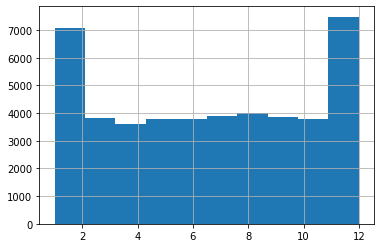

In [412]:
pd.to_datetime(new_spotify['WeekID']).dt.month.hist()

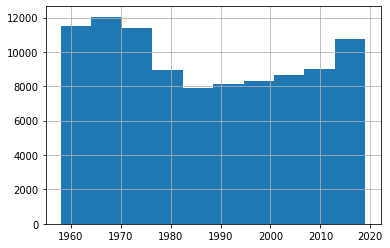

In [372]:
pd.to_datetime(new_spotify['WeekID']).dt.year.hist() it works!

In [373]:
##### Graphs Distorted!!

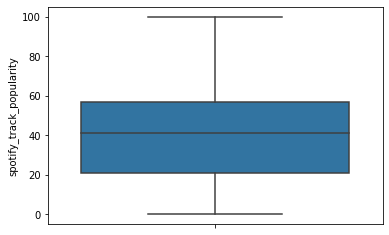

In [374]:
# boxplot popularity 
sns.boxplot( y = new_spotify["spotify_track_popularity"])
plt.show()

In [419]:
###audio_df['Performer'] = audio_df['Performer'].str.lower()
#audio_df['Song'] = audio_df['Song'].str.lower()
#stuff_df['Performer'] = audio_df['Performer'].str.lower()
#stuff_df['Song'] = audio_df['Song'].str.lower()

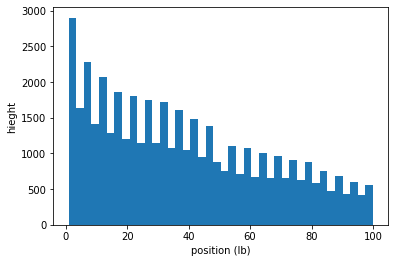

In [422]:
plt.hist(new_spotify['Week Position'], bins=40)
plt.xlabel('position (lb)') 
plt.ylabel('hieght') 
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


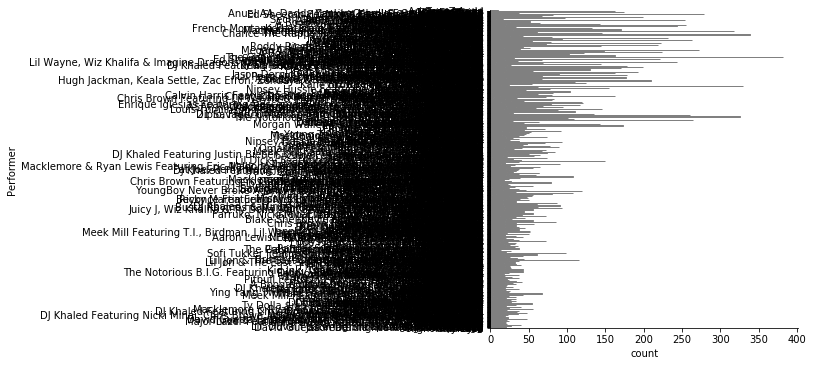